In [15]:
from SLiCAPnotebook import *
t1 = time()

In [16]:
# Define a project
prj = initProject('NMOS EKV polts') # Creates the SLiCAP libraries and the
                                    # project HTML index page

In [17]:
fileName = 'mosEKVplots.cir'
i1 = instruction()           # Creates an instance of an instruction object
i1.setCircuit(fileName)      # Checks and defines the local circuit object and
                             # sets the index page to the circuit index page

No errors found for circuit: 'mosEKVplots' from file: 'mosEKVplots.cir'.



In [18]:
htmlPage('Circuit data')
HTML(netlist2html(fileName))

In [19]:
# Print data of elements of expanded network
HTML(elementData2html(i1.circuit))

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
Cdb_M1_X1,d 0,,C,value,$$c_{db X1}$$,$$3.96 \cdot 10^{-17}$$
Cdg_M1_X1,d g,,C,value,$$c_{dg X1}$$,$$6.6 \cdot 10^{-17}$$
Cgb_M1_X1,g 0,,C,value,$$c_{gb X1}$$,$$4.388 \cdot 10^{-17}$$
Cgs_M1_X1,g s,,C,value,$$c_{gs X1}$$,$$2.316 \cdot 10^{-16}$$
Csb_M1_X1,s 0,,C,value,$$c_{sb X1}$$,$$9.758 \cdot 10^{-17}$$
Gb_M1_X1,d s 0 s,,g,value,$$g_{b X1}$$,$$1.649 \cdot 10^{-5}$$
Gm_M1_X1,d s g s,,g,value,$$g_{m X1}$$,$$4.711 \cdot 10^{-5}$$
Go_M1_X1,d s d s,,g,value,$$g_{o X1}$$,$$4.34 \cdot 10^{-7}$$


In [20]:
# Print the circuit parameters
HTML(params2html(i1.circuit))

Name,Symbolic,Numeric
$$CGBO_{N18}$$,$$1.0 \cdot 10^{-12}$$,$$1.0 \cdot 10^{-12}$$
$$CGSO_{N18}$$,$$3.0 \cdot 10^{-10}$$,$$3.0 \cdot 10^{-10}$$
$$CJB_{0 N18}$$,$$0.001$$,$$0.001$$
$$C_{OX N18}$$,$$\frac{\epsilon_{0} \epsilon_{SiO2}}{TOX_{N18}}$$,$$0.008422$$
$$E_{CRIT N18}$$,$$5.6 \cdot 10^{6}$$,$$5.6 \cdot 10^{6}$$
$$I_{0 N18}$$,$$2 C_{OX N18} N_{s N18} U_{T}^{2} u_{0 N18}$$,$$6.413 \cdot 10^{-7}$$
$$L$$,$$1.8 \cdot 10^{-7}$$,$$1.8 \cdot 10^{-7}$$
$$LDS_{N18}$$,$$1.8 \cdot 10^{-7}$$,$$1.8 \cdot 10^{-7}$$
$$N_{s N18}$$,$$1.35$$,$$1.35$$
$$T$$,$$300$$,$$300.0$$


In [21]:
# Create an HTML page for the plots
htmlPage('CMOS18 EKV model plots')
# Create the plot: set the data type to 'params' and define the step variable. 
# The x variable, the y variable and the sweep variable will be defined with the plot.
# We will start with plotting I_DS versus V_DS with V_GS as step parameter and V_DS as sweep parameter.
i1.setDataType('params')
i1.setStepVar('V_G')
i1.setStepStart(0.001)
i1.setStepStop(1.8)
i1.setStepNum(10)
i1.setStepMethod('lin')
i1.stepOn()
result = i1.execute()

Z:\MSWINDOWS\Anaconda\lib\site-packages\sympy\__init__.py:672: SymPyDeprecationWarning: 

importing sympy.core.symbol with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.symbol instead. See
https://github.com/sympy/sympy/issues/18245 for more info.

  self.Warn(


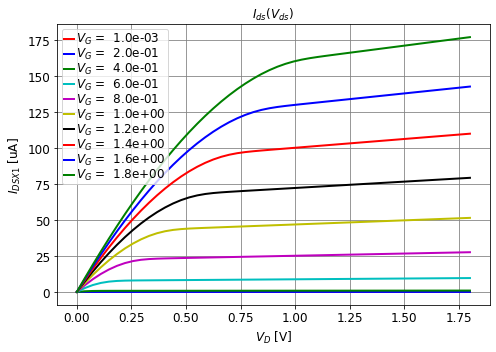

'Z:\\SLiCAP\\SLiCAP_github\\SLiCAP_python3\\examples\\MOSparams/html/img/IdsVds.svg'

In [22]:
fig_Ids_Vds = plotSweep('IdsVds', '$I_{ds}(V_{ds})$', result, 0, 1.8, 50, sweepVar= 'V_D', xUnits = 'V', yVar = 'I_DS_X1', yScale = 'u', yUnits = 'A', funcType = 'param', show = True)
fig2html(fig_Ids_Vds, 600)

In [23]:
# All other plots will be made with V_GS as sweep parameter and V_DS as step parameter.
i1.setStepVar('V_D')
result = i1.execute()

Z:\MSWINDOWS\Anaconda\lib\site-packages\sympy\__init__.py:672: SymPyDeprecationWarning: 

importing sympy.core.symbol with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.symbol instead. See
https://github.com/sympy/sympy/issues/18245 for more info.

  self.Warn(


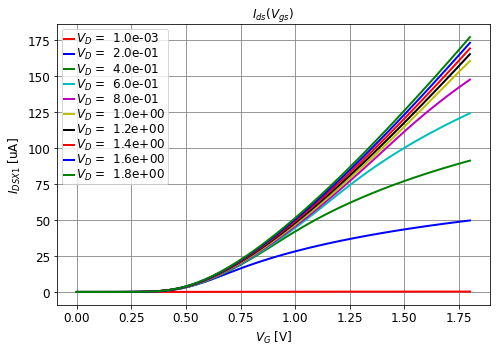

'Z:\\SLiCAP\\SLiCAP_github\\SLiCAP_python3\\examples\\MOSparams/html/img/IdsVgs.svg'

In [24]:
fig_Ids_Vgs = plotSweep('IdsVgs', '$I_{ds}(V_{gs})$', result, 0, 1.8, 50, sweepVar= 'V_G', xUnits = 'V', yVar = 'I_DS_X1', yScale = 'u', yUnits = 'A', funcType = 'param', show = True)
fig2html(fig_Ids_Vgs, 600)

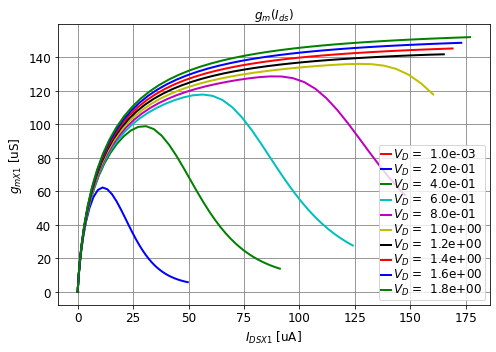

'Z:\\SLiCAP\\SLiCAP_github\\SLiCAP_python3\\examples\\MOSparams/html/img/gmIds.svg'

In [25]:
fig_gm_Ids = plotSweep('gmIds', '$g_m(I_{ds})$', result, 0, 1.8, 50, sweepVar= 'V_G', xVar = 'I_DS_X1', xScale = 'u', xUnits = 'A', yVar = 'g_m_X1', yScale = 'u', yUnits = 'S', funcType = 'param', show = True)
fig2html(fig_gm_Ids, 600)

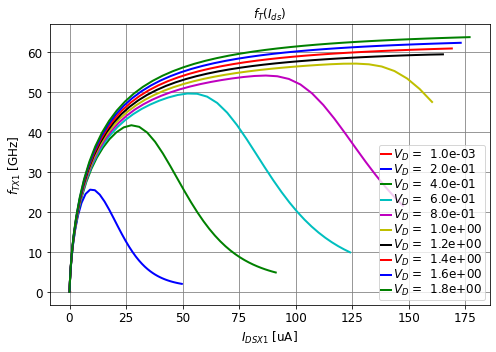

'Z:\\SLiCAP\\SLiCAP_github\\SLiCAP_python3\\examples\\MOSparams/html/img/fTIds.svg'

In [26]:
fig_fT_Ids = plotSweep('fTIds', '$f_{T}(I_{ds})$', result, 0, 1.8, 50, sweepVar= 'V_G', xVar = 'I_DS_X1', xScale = 'u', xUnits = 'A', yVar = 'f_T_X1', yScale = 'G', yUnits = 'Hz', funcType = 'param', show = True)
fig2html(fig_fT_Ids, 600)

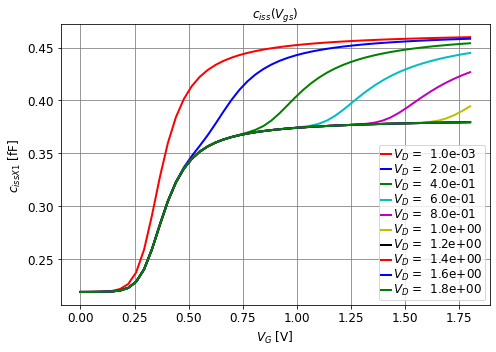

'Z:\\SLiCAP\\SLiCAP_github\\SLiCAP_python3\\examples\\MOSparams/html/img/CissVg.svg'

In [27]:
fig_CissVg = plotSweep('CissVg', '$c_{iss}(V_{gs})$', result, 0, 1.8, 50, sweepVar= 'V_G', xScale = '', xUnits = 'V', yVar = 'c_iss_X1', yScale = 'f', yUnits = 'F', funcType = 'param', show = True)
fig2html(fig_CissVg, 600)

In [28]:
t2=time()
print(t2-t1,'s')

9.903695821762085 s
